In [41]:
from IPython.display import display

import pandas as pd
from arcgis.gis import GIS
import geopandas

from datetime import datetime

In [6]:
gis = GIS()

In [7]:

df_path = "D:\Data\LotteGRS\PopSensor_Training.csv"
df = pd.read_csv(df_path)

df.head()

,OID_,No,Serial,Site,Gu,Address,Type,Height,Lat,Long,Sensor,Model_NM,Server_Type,Visit_Count,Date_Converted,Regist_Date_Converted
0,400000,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,37.59116,126.943006,카메라,SDOT001,00Original,55,2022-09-06 18:50,2022-09-06 18:52
1,400001,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,37.59116,126.943006,카메라,SDOT001,00Original,55,2022-09-06 18:40,2022-09-06 18:42
2,400002,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,37.59116,126.943006,카메라,SDOT001,00Original,56,2022-09-06 18:30,2022-09-06 18:32
3,400003,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,37.59116,126.943006,카메라,SDOT001,00Original,69,2022-09-06 18:20,2022-09-06 18:22
4,400004,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,37.59116,126.943006,카메라,SDOT001,00Original,47,2022-09-06 18:10,2022-09-06 18:12


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248965 entries, 0 to 248964
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   OID_                   248965 non-null  int64  
 1   No                     248965 non-null  int64  
 2   Serial                 248965 non-null  object 
 3   Site                   248965 non-null  int64  
 4   Gu                     248965 non-null  object 
 5   Address                248965 non-null  object 
 6   Type                   248965 non-null  object 
 7   Height                 248965 non-null  float64
 8   Lat                    248965 non-null  float64
 9   Long                   248965 non-null  float64
 10  Sensor                 248965 non-null  object 
 11  Model_NM               248965 non-null  object 
 12  Server_Type            248965 non-null  object 
 13  Visit_Count            248965 non-null  int64  
 14  Date_Converted         248965 non-nu

In [9]:
sedf = pd.DataFrame.spatial.from_xy(df, "Long", "Lat")
sedf.head()

,OID_,No,Serial,Site,Gu,Address,Type,Height,Lat,Long,Sensor,Model_NM,Server_Type,Visit_Count,Date_Converted,Regist_Date_Converted,SHAPE
0,400000,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,37.59116,126.943006,카메라,SDOT001,00Original,55,2022-09-06 18:50,2022-09-06 18:52,"{""spatialReference"": {""wkid"": 4326}, ""x"": 126...."
1,400001,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,37.59116,126.943006,카메라,SDOT001,00Original,55,2022-09-06 18:40,2022-09-06 18:42,"{""spatialReference"": {""wkid"": 4326}, ""x"": 126...."
2,400002,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,37.59116,126.943006,카메라,SDOT001,00Original,56,2022-09-06 18:30,2022-09-06 18:32,"{""spatialReference"": {""wkid"": 4326}, ""x"": 126...."
3,400003,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,37.59116,126.943006,카메라,SDOT001,00Original,69,2022-09-06 18:20,2022-09-06 18:22,"{""spatialReference"": {""wkid"": 4326}, ""x"": 126...."
4,400004,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,37.59116,126.943006,카메라,SDOT001,00Original,47,2022-09-06 18:10,2022-09-06 18:12,"{""spatialReference"": {""wkid"": 4326}, ""x"": 126...."


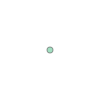

In [10]:
sedf.SHAPE[0]

In [11]:
# Split data
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(sedf, test_size=0.2, random_state=101)

print(f'Shape of training data: {train_data.shape}')
print(f'Shape of test data: {test_data.shape}')

Shape of training data: (199172, 17)
Shape of test data: (49793, 17)


<AxesSubplot:>

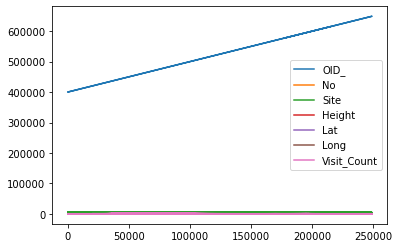

In [12]:
train_data.plot()

In [14]:
train_data.columns

Index(['OID_', 'No', 'Serial', 'Site', 'Gu', 'Address', 'Type', 'Height',
       'Lat', 'Long', 'Sensor', 'Model_NM', 'Server_Type', 'Visit_Count',
       'Date_Converted', 'Regist_Date_Converted', 'SHAPE'],
      dtype='object')

In [39]:
train_x = train_data.iloc[:,-4:-2]
train_y = train_data.iloc[:,-4]
test_x = test_data.iloc[:,-4:-2]
test_y = test_data.iloc[:,-4]

test_x.columns

Index(['Visit_Count', 'Date_Converted'], dtype='object')

In [20]:
from sklearn import linear_model
lr_model = linear_model.LinearRegression()

In [44]:
now = datetime.now()
now.strftime('%A')

'금요일'

In [46]:
test_x.columns

Index(['Visit_Count', 'Date_Converted'], dtype='object')

In [47]:
# Import Plotting libraries
import matplotlib.pyplot as plt

In [75]:
from time import strptime
from dateutil.parser import parse


plt.figure(figsize=(15,10))
test_x.head()
ge = test_x["Date_Converted"]
ge["Date_Converted"] = ge["Date_Converted"].astype(str)

KeyError: 'Date_Converted'

<Figure size 1080x720 with 0 Axes>